In [50]:
import torch
from torch import nn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import make_circles, make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.1+cu121


## Make Classification Data

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=36)
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[-0.51616097 -0.80448756]
 [ 0.21437768 -0.7292871 ]
 [ 0.52268172 -0.61083988]
 [-0.92241222  0.44613843]
 [-0.25736324 -0.70654505]]
First 5 samples of y:
 [0 1 1 0 1]


In [4]:
# Make DataFrame of circle data
circles = pd.DataFrame({
    "X_1": X[:, 0],
    "X_2": X[:, 1],
    "label": y
})
circles.head(10)

,X_1,X_2,label
0,-0.516161,-0.804488,0
1,0.214378,-0.729287,1
2,0.522682,-0.610840,1
3,-0.922412,0.446138,0
4,-0.257363,-0.706545,1
5,0.078599,-0.755956,1
6,-0.065401,-0.975706,0
7,-0.502730,0.653031,1
8,-0.794530,-0.102092,1
9,-0.152934,-1.025184,0


In [5]:
circles.label.value_counts()

0    500
1    500
Name: label, dtype: int64

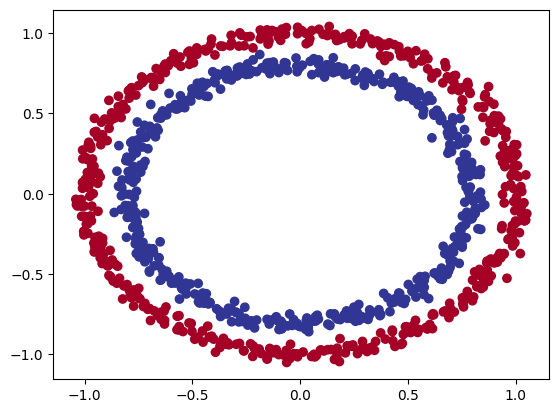

In [6]:
# Visualize
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[-0.51616097, -0.80448756],
       [ 0.21437768, -0.7292871 ],
       [ 0.52268172, -0.61083988],
       ...,
       [ 0.47193053, -0.66317014],
       [ 0.12211491,  0.80297944],
       [-0.20310922,  0.76032911]])

In [9]:
# View the first sample of features & labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.51616097 -0.80448756] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


### Tensors

In [10]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.5162, -0.8045],
         [ 0.2144, -0.7293],
         [ 0.5227, -0.6108],
         [-0.9224,  0.4461],
         [-0.2574, -0.7065]]),
 tensor([0., 1., 1., 0., 1.]))

In [12]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

### Train & Test Splits

In [13]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=36)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
n_samples

1000

## Build the Model

In [16]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [17]:
X_train

tensor([[ 0.2652, -0.9949],
        [ 0.7793, -0.1630],
        [-0.6993, -0.7144],
        ...,
        [-1.0087,  0.2179],
        [ 0.7199,  0.7370],
        [ 0.9776,  0.1132]])

In [18]:
X_train.shape

torch.Size([800, 2])

In [19]:
y_train[:5]

tensor([0., 1., 0., 1., 1.])

In [20]:
# [1] Construct a model that subclasses `nn.module`
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # [2] Create 2 `nn.Linear` layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # [3] Define a `forward()` method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

# Replicate the model using `nn.Sequential()`
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# [4] Instantiate an instance of the model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
device

'cpu'

In [22]:
next(model_0.parameters()).device

device(type='cpu')

In [23]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5323,  0.4670],
                      [-0.2618,  0.3950],
                      [ 0.3360, -0.1201],
                      [-0.6619,  0.7031],
                      [-0.3563,  0.1949]])),
             ('layer_1.bias',
              tensor([ 0.1467,  0.3939, -0.1395, -0.3516,  0.4097])),
             ('layer_2.weight',
              tensor([[-0.3638,  0.0511,  0.1212, -0.1096,  0.2726]])),
             ('layer_2.bias', tensor([-0.3564]))])

In [24]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]])

First 10 labels:
tensor([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.])


In [25]:
X_test[:10], y_test[:10]

(tensor([[-0.7519, -0.2348],
         [ 0.0672, -1.0155],
         [ 0.8382, -0.0326],
         [ 0.9453, -0.3723],
         [ 0.0867,  1.0243],
         [-0.7047, -0.4041],
         [ 0.8015,  0.1478],
         [-0.9936,  0.2249],
         [ 0.1271,  0.7600],
         [-0.6808, -0.3660]]),
 tensor([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.]))

### Setup Loss Function & Optimizer

In [26]:
# Setup the loss function
# loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [27]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Training
### Raw Logits, Prediction Probabilities & Prediction Labels

In [28]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0686],
        [-0.0780],
        [-0.4102],
        [-0.3667],
        [-0.4657]])

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 0.])

In [30]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4829],
        [0.4805],
        [0.3989],
        [0.4093],
        [0.3856]])

In [31]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

### Training & Testing Loop

In [32]:
torch.manual_seed(36)
torch.cuda.manual_seed(36)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training & evaluation loop
for epoch in range(epochs):
  # Training
  model_0.train()

  # [1] Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # [2] Calculate loss/acc
  # `nn.BCELoss` expects prediction probabilities as input
  # loss = loss_fn(torch.sigmoid(y_logits), y_train)
  # `nn.BCEWithLogitsLoss` expects raw logits as input
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # [3] Optimizer zero grad
  optimizer.zero_grad()

  # [4] Loss backward (backpropagation)
  loss.backward()

  # [5] Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # [1] Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # [2] Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc}%")

Epoch: 0 | Loss: 0.70510, Acc: 46.12% | Test loss: 0.70325, Test acc: 43.5%
Epoch: 10 | Loss: 0.69944, Acc: 45.25% | Test loss: 0.69975, Test acc: 47.5%
Epoch: 20 | Loss: 0.69669, Acc: 48.50% | Test loss: 0.69883, Test acc: 47.0%
Epoch: 30 | Loss: 0.69525, Acc: 48.88% | Test loss: 0.69896, Test acc: 48.0%
Epoch: 40 | Loss: 0.69441, Acc: 49.12% | Test loss: 0.69950, Test acc: 47.0%
Epoch: 50 | Loss: 0.69388, Acc: 49.50% | Test loss: 0.70015, Test acc: 47.0%
Epoch: 60 | Loss: 0.69350, Acc: 50.50% | Test loss: 0.70080, Test acc: 47.0%
Epoch: 70 | Loss: 0.69321, Acc: 50.50% | Test loss: 0.70141, Test acc: 47.0%
Epoch: 80 | Loss: 0.69299, Acc: 50.88% | Test loss: 0.70195, Test acc: 46.0%
Epoch: 90 | Loss: 0.69281, Acc: 51.00% | Test loss: 0.70243, Test acc: 46.0%


## Make Predictions & Evaluate the Model

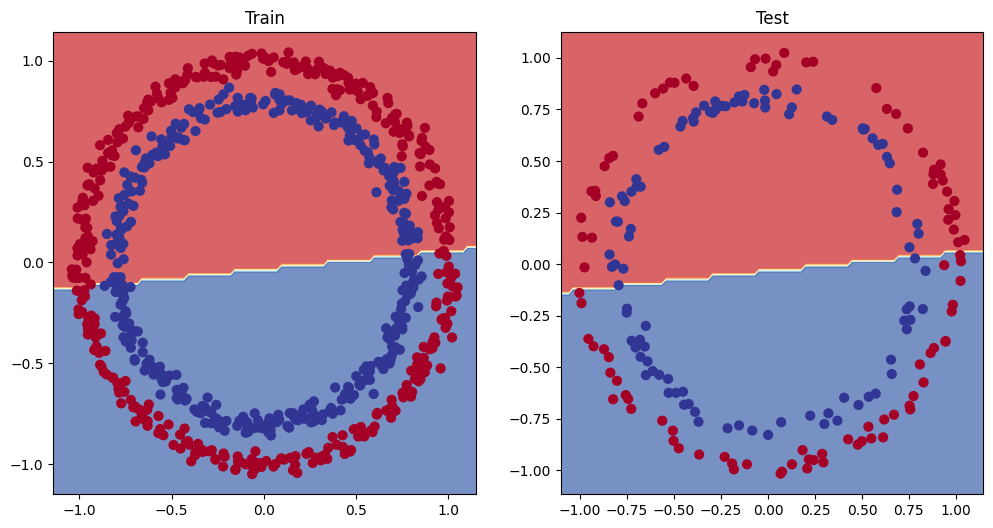

In [33]:
# Plot decision boundaries of model predicting on X in comparison to y
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
  # Put everything to CPU for working better with NumPy & Matplotlib
  model.to("cpu")
  X, y = X.to("cpu"), y.to("cpu")

  # Setup prediction boundaries & grid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

  # Make features
  X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

  # Make predictions
  model.eval()
  with torch.inference_mode():
    y_logits = model(X_to_pred_on)

  # Test for multi-class or binary and adjust logits to prediction labels
  if len(torch.unique(y)) > 2:
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
  else:
    y_pred = torch.round(torch.sigmoid(y_logits))  # binary

  # Reshape preds and plot
  y_pred = y_pred.reshape(xx.shape).detach().numpy()
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improvement

In [34]:
# Create a new model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

# model_1 = nn.Sequential(
#     nn.Linear(in_features=1, out_features=10),
#     nn.Linear(in_features=10, out_features=10),
#     nn.Linear(in_features=10, out_features=1)
# ).to(device)

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [35]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

# Write a training and evaluation loop for model_1
torch.manual_seed(36)
torch.cuda.manual_seed(36)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model_1.train()
  # [1] Forward pass
  y_logits = model_1(X_train).squeeze()
  # Raw logits to prediction probabilities to prediction labels
  y_pred = torch.round(torch.sigmoid(y_logits))

  # [2] Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # [3] Optimizer zero grad
  optimizer.zero_grad()

  # [4] Loss backward (backpropagation)
  loss.backward()

  # [5] Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    # [1] Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # [2] Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc}%")

Epoch: 0 | Loss: 0.69269, Acc: 55.88% | Test loss: 0.69617, Test acc: 47.5%
Epoch: 100 | Loss: 0.69184, Acc: 52.38% | Test loss: 0.70299, Test acc: 39.5%
Epoch: 200 | Loss: 0.69179, Acc: 52.25% | Test loss: 0.70486, Test acc: 39.0%
Epoch: 300 | Loss: 0.69179, Acc: 52.38% | Test loss: 0.70535, Test acc: 39.0%
Epoch: 400 | Loss: 0.69179, Acc: 52.38% | Test loss: 0.70548, Test acc: 39.0%
Epoch: 500 | Loss: 0.69179, Acc: 52.38% | Test loss: 0.70551, Test acc: 39.0%
Epoch: 600 | Loss: 0.69179, Acc: 52.38% | Test loss: 0.70552, Test acc: 39.0%
Epoch: 700 | Loss: 0.69179, Acc: 52.38% | Test loss: 0.70552, Test acc: 39.0%
Epoch: 800 | Loss: 0.69179, Acc: 52.38% | Test loss: 0.70552, Test acc: 39.0%
Epoch: 900 | Loss: 0.69179, Acc: 52.38% | Test loss: 0.70552, Test acc: 39.0%


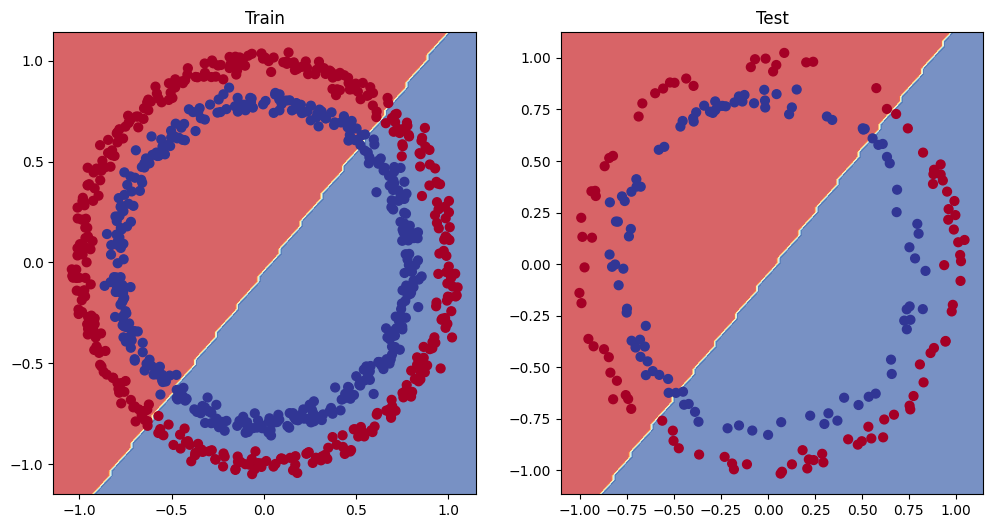

In [36]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Non-Linearity

In [37]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    # relu is a non-linear activation function
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [38]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

# Write a training and evaluation loop for model_1
torch.manual_seed(36)
torch.cuda.manual_seed(36)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model_2.train()
  # [1] Forward pass
  y_logits = model_2(X_train).squeeze()
  # Raw logits to prediction probabilities to prediction labels
  y_pred = torch.round(torch.sigmoid(y_logits))

  # [2] Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # [3] Optimizer zero grad
  optimizer.zero_grad()

  # [4] Loss backward (backpropagation)
  loss.backward()

  # [5] Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    # [1] Forward pass
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # [2] Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc}%")

Epoch: 0 | Loss: 0.69426, Acc: 50.12% | Test loss: 0.69634, Test acc: 49.5%
Epoch: 100 | Loss: 0.69246, Acc: 50.25% | Test loss: 0.69451, Test acc: 41.5%
Epoch: 200 | Loss: 0.69033, Acc: 53.75% | Test loss: 0.69209, Test acc: 49.0%
Epoch: 300 | Loss: 0.68736, Acc: 66.12% | Test loss: 0.68928, Test acc: 60.0%
Epoch: 400 | Loss: 0.68280, Acc: 67.75% | Test loss: 0.68586, Test acc: 66.0%
Epoch: 500 | Loss: 0.67490, Acc: 65.12% | Test loss: 0.68145, Test acc: 59.5%
Epoch: 600 | Loss: 0.66197, Acc: 62.25% | Test loss: 0.67474, Test acc: 55.00000000000001%
Epoch: 700 | Loss: 0.63966, Acc: 67.12% | Test loss: 0.66028, Test acc: 59.5%
Epoch: 800 | Loss: 0.59933, Acc: 79.50% | Test loss: 0.62516, Test acc: 72.5%
Epoch: 900 | Loss: 0.52661, Acc: 91.88% | Test loss: 0.55451, Test acc: 90.5%


In [39]:
# Makes predictions
model_2.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.]),
 tensor([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.]))

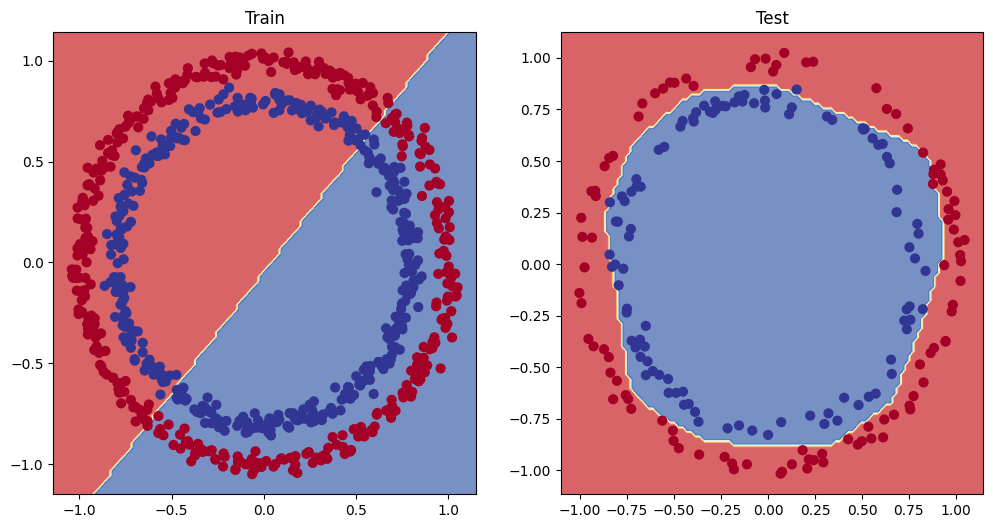

In [40]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
# `model_1` has no non-linearity
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
# `model_2` has non-linearity
plot_decision_boundary(model_2, X_test, y_test)

## Non-Linear Activation Functions

In [41]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [42]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

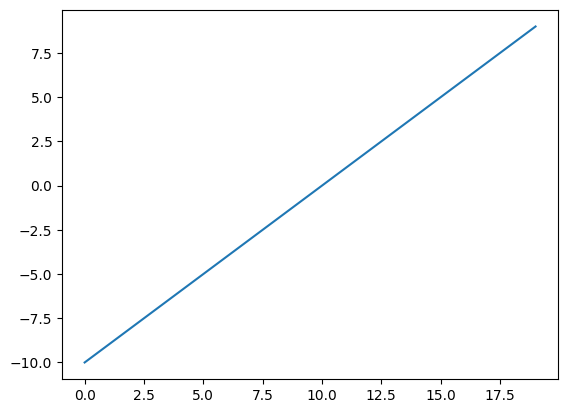

In [43]:
# Visualize the tensor
plt.plot(A);

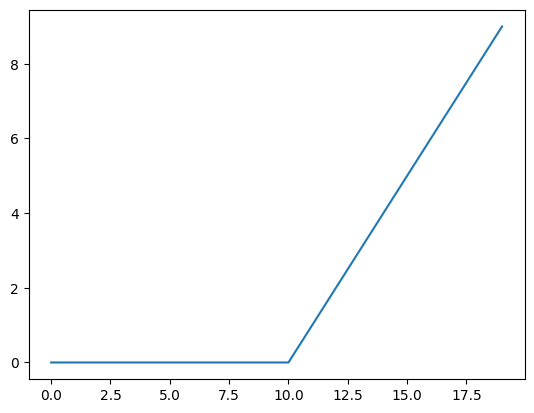

In [44]:
plt.plot(torch.relu(A))

In [45]:
def relu(x: torch.Tensor) -> torch.Tensor:
  # Inputs must be tensors
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

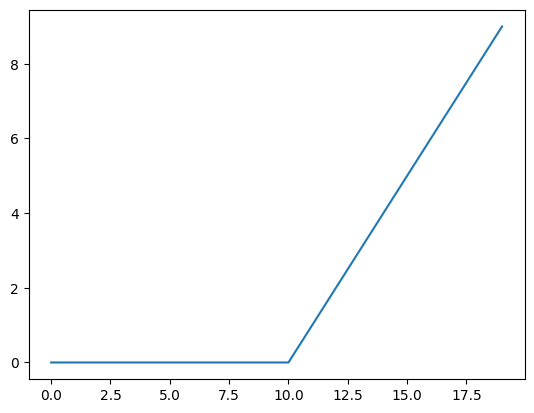

In [46]:
# Plot ReLU activation function
plt.plot(relu(A));

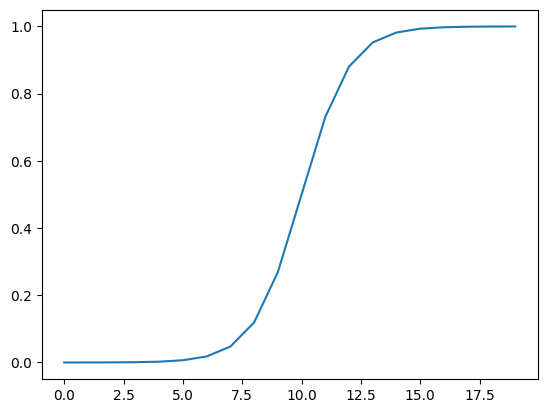

In [47]:
plt.plot(torch.sigmoid(A));

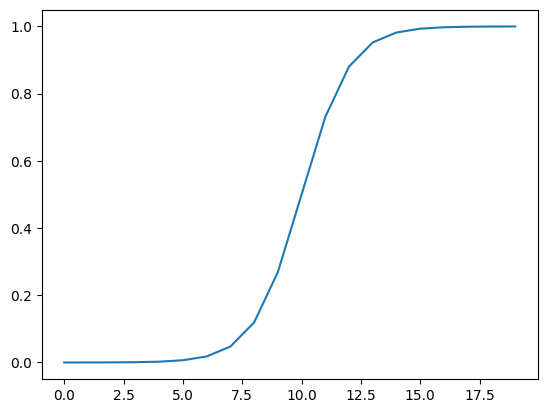

In [48]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid(A));

## Multi-Class Classification
### Multi-Class Dataset

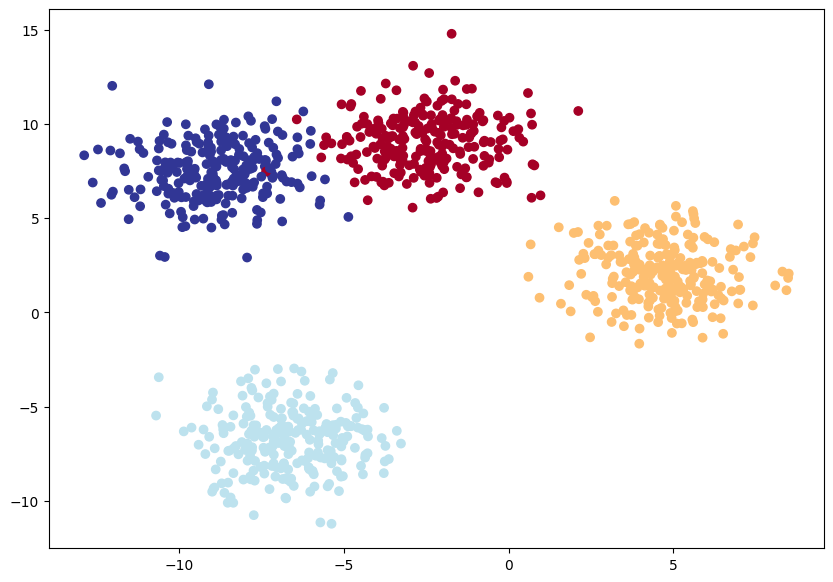

In [51]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 36

# [1] Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# [2] Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# [3] Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# [4] Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### Multi-Class Classification Model

In [52]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [53]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_3 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_3

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [54]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [55]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [56]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

# Get some raw outputs of the model (logits)
model_2.eval()
with torch.inference_mode():
  y_logits = model_3(X_blob_test.to(device))

y_logits[:10]

tensor([[ 0.7332, -0.3147,  0.1960,  0.7890],
        [ 1.7201,  2.1242, -0.8147, -2.3188],
        [-1.1783,  0.1843, -0.6760, -1.2475],
        [ 0.1391, -0.5156,  0.1179,  0.7052],
        [ 2.0226,  1.1437, -0.1882, -0.6059],
        [ 1.9825,  2.5361, -0.9552, -2.7802],
        [-1.3978, -0.2160, -0.5283, -0.7756],
        [ 1.8902,  1.3659, -0.3503, -1.0364],
        [-0.9917,  0.7249, -0.9101, -1.9577],
        [ 1.9037,  1.2602, -0.2888, -0.8643]])

In [57]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [59]:
# Convert the model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:10])

tensor([[0.3342, 0.1172, 0.1953, 0.3534],
        [0.3854, 0.5773, 0.0306, 0.0068],
        [0.1335, 0.5214, 0.2206, 0.1246],
        [0.2347, 0.1220, 0.2298, 0.4135],
        [0.6262, 0.2600, 0.0686, 0.0452],
        [0.3570, 0.6210, 0.0189, 0.0030],
        [0.1175, 0.3832, 0.2804, 0.2189],
        [0.5708, 0.3379, 0.0607, 0.0306],
        [0.1245, 0.6930, 0.1351, 0.0474],
        [0.5883, 0.3091, 0.0657, 0.0369]])


In [60]:
# Convert the model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 1, 1, 3, 0, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 3, 0, 1, 3, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 3, 0, 0, 3, 1, 1, 3, 3, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
        3, 0, 1, 1, 0, 0, 1, 0, 1, 1, 3, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 0, 3, 1,
        1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 1, 1, 1, 0, 1, 0, 0, 3, 3, 3, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 3, 1, 1, 0, 0, 1, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 1, 3, 3, 3, 3, 3, 1, 3, 0, 1, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0,
        3, 1, 1, 0, 1, 3, 1, 3])

In [61]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [62]:
# Fit the multi-class model to the data
torch.manual_seed(36)
torch.cuda.manual_seed(36)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  # Training
  model_3.train()

  y_logits = model_3(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.4814, Acc: 25.00% | Test loss: 0.6955, Test acc: 54.50%
Epoch: 10 | Loss: 0.1709, Acc: 99.00% | Test loss: 0.1535, Test acc: 99.00%
Epoch: 20 | Loss: 0.0908, Acc: 99.00% | Test loss: 0.0820, Test acc: 99.50%
Epoch: 30 | Loss: 0.0649, Acc: 99.12% | Test loss: 0.0571, Test acc: 99.50%
Epoch: 40 | Loss: 0.0528, Acc: 99.12% | Test loss: 0.0450, Test acc: 99.50%
Epoch: 50 | Loss: 0.0459, Acc: 99.12% | Test loss: 0.0380, Test acc: 99.50%
Epoch: 60 | Loss: 0.0416, Acc: 99.12% | Test loss: 0.0335, Test acc: 99.50%
Epoch: 70 | Loss: 0.0386, Acc: 99.12% | Test loss: 0.0303, Test acc: 99.50%
Epoch: 80 | Loss: 0.0364, Acc: 99.12% | Test loss: 0.0279, Test acc: 99.50%
Epoch: 90 | Loss: 0.0348, Acc: 99.12% | Test loss: 0.0262, Test acc: 99.50%
